In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [25]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
dataset

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [16]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='relu'), 
    tf.keras.layers.Dense(units=1) 
])

In [36]:
ann.compile( optimizer = 'adam', loss = 'mean_squared_error')

In [38]:
ann.fit( X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.0000e+00 - loss: 27.9219
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.0000e+00 - loss: 27.5000
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.0000e+00 - loss: 28.0526
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.0000e+00 - loss: 27.7339
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.0000e+00 - loss: 27.1251
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.0000e+00 - loss: 28.3789
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.0000e+00 - loss: 26.9663
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.0000e+00 - loss: 27.2024
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.0000e+00 - loss: 26.6666
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.0000e+00 - loss: 26.7711
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - a

In [47]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
result = np.column_stack((y_pred, y_test)) # Combine two arrays horizontal and transnform into a array with 2 columns apart
print(result[::])

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step
[[430.9  431.23]
 [461.92 460.01]
 [465.4  461.14]
 ...
 [472.66 473.26]
 [439.42 438.  ]
 [458.65 463.28]]


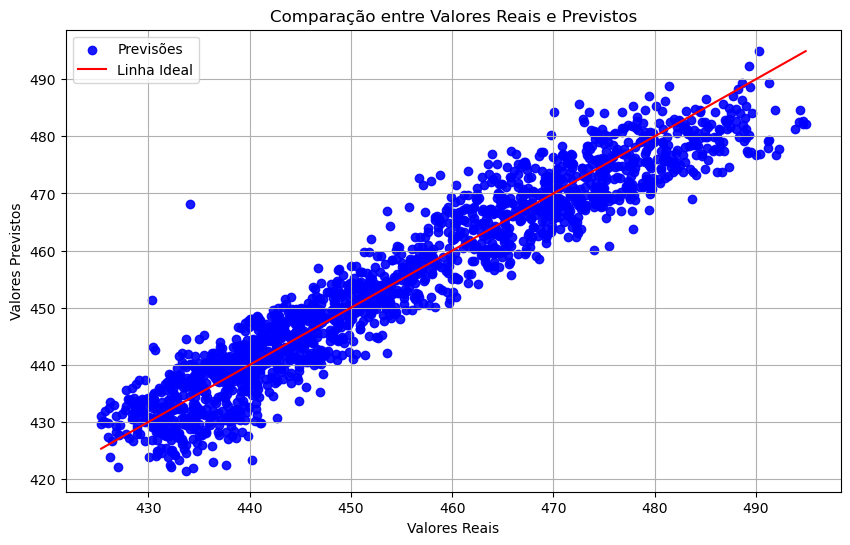

In [59]:
plt.figure(figsize=(10, 6))                                #Transparência
plt.scatter(y_test, y_pred, color='blue', label='Previsões', alpha=0.9)
                # Eixo X                    #Eixo Y
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.legend() # Legenda em cima
plt.grid() # Linhas do gráfico
plt.show() # mostrar gráfico